# ML - Linear regression, KNN, SVM

## Linear regression

In [55]:
#Import Library
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

data = pd.read_csv("Datasets/Students/student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [56]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

In [58]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [59]:

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

0.9072825900231904
Coefficient: 
 [ 0.13527031  0.98751848 -0.20498797 -0.33339246  0.0360702 ]
Intercept: 
 -1.3353139222187735
11.953607354545625 [11 12  2  0 10] 13
8.648370883609443 [9 9 2 0 8] 9
6.748413614780693 [ 6  8  1  3 16] 8
14.253304400739522 [15 14  2  0  4] 14
8.012543885152066 [10  8  2  0 14] 9
18.95845802835205 [18 18  1  0  8] 18
8.6393604136566 [10  9  2  0  4] 11
13.130515603322937 [14 13  2  0  4] 13
8.524114358116751 [ 8  8  1  0 30] 8
9.358341590467683 [ 9  9  1  0 22] 9
18.440271505465734 [18 18  3  0  5] 19
9.83186686648655 [10 10  1  0  4] 10
-0.5278570449856139 [9 0 2 0 0] 0
5.831032204076057 [5 8 2 3 0] 7
8.538406750456677 [ 7 10  3  1  0] 10
15.033412181729727 [14 15  2  0  2] 15
10.677527304643373 [11 11  2  0  2] 11
9.13533268256865 [11  9  2  0 14] 9
10.54225699206339 [10 11  2  0  2] 12
13.479784353849112 [14 13  1  0  8] 13
10.677527304643373 [11 11  2  0  2] 11
16.131563989318995 [15 16  3  0  7] 15
12.025747745812037 [11 12  2  0 12] 11
-1.003385638

## Saving model and importing

In [60]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

### Saving 

In [61]:
with open("Models/studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

# linear is the name of the model we created in the last tutorial
# it should be defined above this

### Loading model 

In [62]:
pickle_in = open("Models/studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

# Now we can use linear to predict grades like before

### Training multiple model


In [66]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()
    
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("Models/studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
            
print("\nBest accuracy: ", best)

Accuracy: 0.7120505837839677
Accuracy: 0.8419740188965523
Accuracy: 0.8020262406782782
Accuracy: 0.6940409192793664
Accuracy: 0.8940235536728673
Accuracy: 0.8145923637342816
Accuracy: 0.8471013396643304
Accuracy: 0.7832990829886533
Accuracy: 0.8054626583260116
Accuracy: 0.8402321980392969
Accuracy: 0.8331033509590885
Accuracy: 0.8458394692949511
Accuracy: 0.9357285240967607
Accuracy: 0.9110387297485635
Accuracy: 0.7468333796226976
Accuracy: 0.7767352849982638
Accuracy: 0.8364676561627661
Accuracy: 0.8527521275793825
Accuracy: 0.8992992485819427
Accuracy: 0.7452038544962007

Best accuracy:  0.9357285240967607


### Plotting data

No handles with labels found to put in legend.


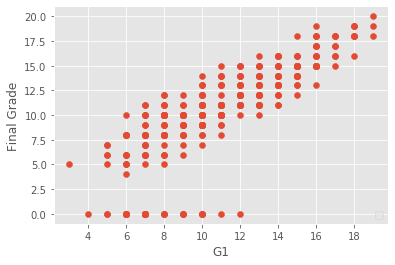

In [71]:
# Drawing and plotting model
style.use("ggplot")
plot = "G1" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No handles with labels found to put in legend.


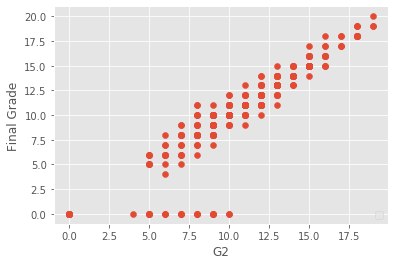

In [73]:
plot = "G2" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No handles with labels found to put in legend.


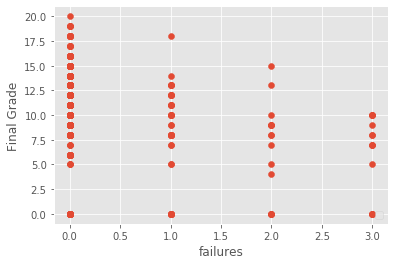

In [74]:
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

# K-Nearest Neighbors (KNN)

In [38]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

data = pd.read_csv("Datasets/Car Data Set/car.data")
print(data.head())

le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))
 
predict = "class"  #optional



  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc


In [40]:
X = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(cls)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

model = KNeighborsClassifier(n_neighbors=9)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print("Accuracy model: ",acc)


Accuracy model:  0.9479768786127167


In [41]:
predicted = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], "Data: ", x_test[x], "Actual: ", names[y_test[x]])
    n = model.kneighbors([x_test[x]], 9, True)
    print("N: ", n)

Predicted:  good Data:  (3, 3, 3, 2, 2, 2) Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1237,  705,  154,  339, 1066, 1092,  239,  757, 1143]],
      dtype=int64))
Predicted:  unacc Data:  (3, 2, 2, 2, 2, 0) Actual:  unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.41421356, 1.41421356]]), array([[ 680,  814,  913,  466,  842,  266,  927,  508, 1218]],
      dtype=int64))
Predicted:  unacc Data:  (0, 0, 3, 1, 0, 0) Actual:  unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.41421356, 1.41421356]]), array([[1115,   94, 1417,  673, 1000, 1512,  796,   11,  510]],
      dtype=int64))
Predicted:  acc Data:  (1, 2, 3, 1, 2, 0) Actual:  acc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.414

# Support Vector Machines (SVM)

In [46]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

cancer = datasets.load_breast_cancer()

print(cancer.feature_names)
print(cancer.target_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [47]:
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

print(x_train, y_train)

[[1.095e+01 2.135e+01 7.190e+01 ... 1.424e-01 2.964e-01 9.606e-02]
 [1.300e+01 2.182e+01 8.750e+01 ... 2.060e-01 4.378e-01 1.072e-01]
 [1.184e+01 1.894e+01 7.551e+01 ... 6.913e-02 2.535e-01 7.993e-02]
 ...
 [1.187e+01 2.154e+01 7.683e+01 ... 8.750e-02 2.305e-01 9.952e-02]
 [1.094e+01 1.859e+01 7.039e+01 ... 7.887e-02 2.251e-01 7.732e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]] [0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1
 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 

In [49]:
clf = svm.SVC(kernel="linear")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

print("Accuracy: ",acc)

Accuracy:  0.9385964912280702
